In [1]:
from helper import *
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [2]:
fo = pd.ExcelFile('cleaned2014.xls') 
# clean-data.xlsx
df = pd.read_excel(fo, 'Sheet1')
print(df)

                                                   text
0                              buku jaringan komputer i
1     perancangan implementasi user interface web mo...
2     analisis optimalisasi jaringan teknik load bal...
3     perancangan analisis perbandingan implementasi...
4     analisis keamanan jaringan wireless lan wlan p...
5                           trik jaringan komputer wifi
6     pengembangan lab komputer sederhana jaringan m...
7     analisa perancangan server voip voice internet...
8                          cara mudah jaringan wireless
9     rancang bangun cloud computing laboratorium ko...
10    analisis pemasaran bisnis online e commerce ja...
11    analisis quality service qos jaringan internet...
12    analisis kualitas layanan video live streaming...
13    perancangan jaringan sensor nirkabel jsn meman...
14    analisis kinerja routing dinamis teknik rip ro...
15    perancangan vlan jaringan komputer rumah sakit...
16    analisis kinerja routing dinamis teknik os

In [3]:
#drop empty line
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

text = df['text']
text_list =  [i.split() for i in text]
print(len(text_list))
print(text_list[:1])

8125
[['buku', 'jaringan', 'komputer', 'i']]


In [4]:
#Create Biagram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs, minimum count 5 means only that appear 5 times or more.
bigram = Phrases(text_list, min_count=5)
trigram = Phrases(bigram[text_list], min_count=5)

for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
            
print(text_list)

[['buku', 'jaringan', 'komputer', 'i', 'jaringan_komputer', 'jaringan_komputer', 'jaringan_komputer'], ['perancangan', 'implementasi', 'user', 'interface', 'web', 'monitoring', 'suhu', 'kelembaban', 'asap', 'ruangan', 'berbeda', 'memanfaatkan', 'user_interface', 'monitoring_suhu', 'user_interface', 'monitoring_suhu', 'user_interface', 'monitoring_suhu'], ['analisis', 'optimalisasi', 'jaringan', 'teknik', 'load', 'balancing', 'studi', 'kasus', 'jaringan', 'uad', 'kampus', 'load_balancing', 'studi_kasus', 'load_balancing', 'studi_kasus', 'load_balancing', 'studi_kasus'], ['perancangan', 'analisis', 'perbandingan', 'implementasi', 'ospf', 'jaringan', 'ipv4', 'ipv6', 'analisis_perbandingan', 'analisis_perbandingan', 'analisis_perbandingan'], ['analisis', 'keamanan', 'jaringan', 'wireless', 'lan', 'wlan', 'pln', 'persero', 'wilayah', 'p2b', 'area', 'sorong', 'keamanan_jaringan', 'wireless_lan', 'pln_persero', 'keamanan_jaringan', 'pln_persero', 'keamanan_jaringan', 'wireless_lan', 'pln_pers

In [5]:
phrasedf = pd.DataFrame(text_list)
print(phrasedf)

                0              1              2              3   \
0             buku       jaringan       komputer              i   
1      perancangan   implementasi           user      interface   
2         analisis   optimalisasi       jaringan         teknik   
3      perancangan       analisis   perbandingan   implementasi   
4         analisis       keamanan       jaringan       wireless   
5             trik       jaringan       komputer           wifi   
6     pengembangan            lab       komputer      sederhana   
7          analisa    perancangan         server           voip   
8             cara          mudah       jaringan       wireless   
9          rancang         bangun          cloud      computing   
10        analisis      pemasaran         bisnis         online   
11        analisis        quality        service            qos   
12        analisis       kualitas        layanan          video   
13     perancangan       jaringan         sensor       nirkabe

In [6]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=1, no_above=0.5)
print(dictionary)

Dictionary(11167 unique tokens: ['buku', 'i', 'jaringan', 'jaringan_komputer', 'komputer']...)


In [7]:
#build bag of words (corpus)
bow = [dictionary.doc2bow(doc) for doc in text_list]

print(len(bow))
# print(doc_term_matrix[100])

# calculate TF-IDF
tfidf = models.TfidfModel(bow)
corpus_tfidf = tfidf[bow]
# similarity = pd.DataFrame(corpus_tfidf, columns=['Topic']).to_csv("similarity.csv")

# print(corpus_tfidf)

# feature_names = tfidf.get_feature_names()
# corpus_index = [n for n in corpus_tfidf]

# showme = pd.DataFrame(tfs.T.todense(), index=feature_names, columns=corpus_index)
# print(showme)

# for i in corpus_tfidf:
#     result = pd.DataFrame()
#     result = result.append(pd.Series(corpus_tfidf), ignore_index=True)
#     print(result)

8125


In [8]:
import numpy as np
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    np.random.seed(9)
    model_list = []
    num_topics = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

# num_topics

In [9]:
start=2
limit=20
step=2
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=text_list, start=start, limit=limit, step=step)

In [10]:
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

<Figure size 640x480 with 1 Axes>

In [11]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 10))

Num Topics = 2  has Coherence Value of 0.3911752008
Num Topics = 4  has Coherence Value of 0.4822300549
Num Topics = 6  has Coherence Value of 0.5333076049
Num Topics = 8  has Coherence Value of 0.5414684476
Num Topics = 10  has Coherence Value of 0.5494463009
Num Topics = 12  has Coherence Value of 0.5711876835
Num Topics = 14  has Coherence Value of 0.5589907416
Num Topics = 16  has Coherence Value of 0.5550537361
Num Topics = 18  has Coherence Value of 0.5496714421


In [12]:
from pprint import pprint

model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=12)
pprint(model.print_topics())

[(0,
  '0.020*"pengolahan_data" + 0.016*"rancang_bangun" + '
  '0.013*"media_pembelajaran" + 0.011*"cipher" + 0.009*"bahan_ajar" + '
  '0.008*"penjualan" + 0.008*"universitas_kristen" + 0.007*"game_edukasi" + '
  '0.007*"rekam_medis" + 0.007*"jaringan_wireless"'),
 (1,
  '0.025*"sms_gateway" + 0.018*"e_commerce" + 0.015*"universitas_bina" + '
  '0.011*"rumah_sakit" + 0.009*"sms" + 0.008*"pengelolaan_keuangan" + '
  '0.008*"bimbingan_belajar" + 0.008*"gateway" + 0.008*"informasi_akademik" + '
  '0.008*"via_sms"'),
 (2,
  '0.011*"client_server" + 0.010*"rsa" + 0.008*"php_mysql" + '
  '0.008*"kriptografi" + 0.008*"studi_kasus" + 0.007*"radio_frequency" + '
  '0.007*"efisiensi" + 0.006*"implementasi_algoritma" + '
  '0.006*"teknologi_informasi" + 0.006*"pribadi"'),
 (3,
  '0.025*"e_mail" + 0.014*"implementasi_algoritma" + 0.010*"mail" + '
  '0.008*"pemilihan_umum" + 0.008*"pendahuluan" + 0.008*"kota_bengkulu" + '
  '0.008*"profil_sekolah" + 0.008*"pencegahan" + 0.007*"jabodetabek" + '
  '0

In [13]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=12)

for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.017*"universitas_bina" + 0.014*"metode_ahp" + 0.010*"kriptografi" + 0.009*"rsa" + 0.008*"metode_forward" + 0.008*"sistem_pakar" + 0.007*"autis" + 0.007*"pengamanan" + 0.007*"dunia_maya" + 0.007*"metode"
Topic: 1 Word: 0.027*"sms_gateway" + 0.012*"hukum" + 0.009*"perlindungan_hukum" + 0.009*"sms" + 0.008*"sumber_daya" + 0.008*"gateway" + 0.008*"kota_palembang" + 0.008*"sistem_pendukung" + 0.007*"universitas_negeri" + 0.007*"pendahuluan"
Topic: 2 Word: 0.018*"media_pembelajaran" + 0.011*"pengelolaan_keuangan" + 0.010*"kota_semarang" + 0.010*"game_edukasi" + 0.009*"edukasi" + 0.008*"wpa" + 0.008*"radius" + 0.008*"jarak_jauh" + 0.008*"tutorial" + 0.007*"bahasa_inggris"
Topic: 3 Word: 0.012*"visual_basic" + 0.010*"algoritma_aes" + 0.010*"sistem_pendukung" + 0.010*"jaringan_komputer" + 0.009*"mobile_android" + 0.008*"keputusan_pemilihan" + 0.007*"via_sms" + 0.007*"jawa_timur" + 0.006*"rancang_bangun" + 0.006*"studi_kasus"
Topic: 4 Word: 0.011*"industri_kreatif" + 0.010*"peng

# Dominant topic and its percentage contribution in each document

In [14]:
def format_topics_sentences(ldamodel=None, corpus=bow, texts=text):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        # check notes 28/9
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(model, corpus=bow, texts=text_list)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['No_Dokumen', 'Topik_Dominan', 'Persentase_Kontribusi', 'Kata_Kunci', 'Teks']
df_dominant_topic.head(247)

,No_Dokumen,Topik_Dominan,Persentase_Kontribusi,Kata_Kunci,Teks
0,0,3.0,0.8854,"visual_basic, algoritma_aes, sistem_pendukung,...","[buku, jaringan, komputer, i, jaringan_kompute..."
1,1,7.0,0.3628,"keamanan_jaringan, enkripsi_dekripsi, client_s...","[perancangan, implementasi, user, interface, w..."
2,2,2.0,0.4955,"media_pembelajaran, pengelolaan_keuangan, kota...","[analisis, optimalisasi, jaringan, teknik, loa..."
3,3,0.0,0.9236,"universitas_bina, metode_ahp, kriptografi, rsa...","[perancangan, analisis, perbandingan, implemen..."
4,4,6.0,0.9055,"e_mail, mempengaruhi_kualitas, mail, bagian, k...","[analisis, keamanan, jaringan, wireless, lan, ..."
5,5,3.0,0.5855,"visual_basic, algoritma_aes, sistem_pendukung,...","[trik, jaringan, komputer, wifi, jaringan_komp..."
6,6,2.0,0.8207,"media_pembelajaran, pengelolaan_keuangan, kota...","[pengembangan, lab, komputer, sederhana, jarin..."
7,7,9.0,0.3400,"implementasi_algoritma, rumah_sakit, cipher, d...","[analisa, perancangan, server, voip, voice, in..."
8,8,5.0,0.7267,"keamanan_jaringan, intrusion_detection, conten...","[cara, mudah, jaringan, wireless, jaringan_wir..."
9,9,10.0,0.6357,"program_studi, siswa_kelas, hasil_belajar, smp...","[rancang, bangun, cloud, computing, laboratori..."


In [15]:
# Generate dataframe from list and write to xlsx.
pd.DataFrame(df_dominant_topic, columns=['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']).to_excel('topics.xls', header=True, index=False)

In [16]:
count_topics = df_dominant_topic['Topik_Dominan'].value_counts()
count_topics

3.0     980
7.0     817
1.0     800
0.0     754
4.0     708
10.0    667
6.0     660
11.0    645
8.0     616
2.0     516
9.0     512
5.0     450
Name: Topik_Dominan, dtype: int64

In [17]:
# matplotlib inline

Text(0.5,1,'Persebaran Banyak Judul Penelitian Berdasarkan Topik')

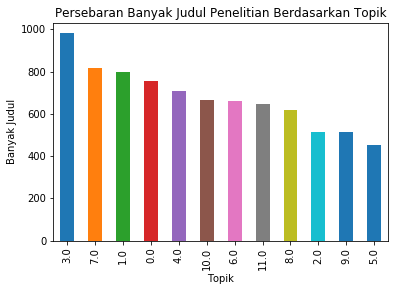

In [18]:
count_topics.plot.bar()

plt.xlabel('Topik')
plt.ylabel('Banyak Judul')
plt.title('Persebaran Banyak Judul Penelitian Berdasarkan Topik')

# The most representative sentence for each topic

In [19]:
# Display setting to show more characters in column
# Mallet
pd.options.display.max_colwidth = 100

sent_topics_sorteddf = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf.head(20)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9673,"universitas_bina, metode_ahp, kriptografi, rsa, metode_forward, sistem_pakar, autis, pengamanan,...","[sistem, pendukung, keputusan, seleksi, calon, karyawan, metode, promethee, studi, kasus, pamell..."
1,1.0,0.9704,"sms_gateway, hukum, perlindungan_hukum, sms, sumber_daya, gateway, kota_palembang, sistem_penduk...","[sistem, pakar, tindakan, bidan, pemeriksan, ibu, hamil, metode, technique, order, preference, b..."
2,2.0,0.9563,"media_pembelajaran, pengelolaan_keuangan, kota_semarang, game_edukasi, edukasi, wpa, radius, jar...","[analisis, perancangan, load, balancing, metode, round, robin, carp, studi, kasus, astrido, grou..."
3,3.0,0.9722,"visual_basic, algoritma_aes, sistem_pendukung, jaringan_komputer, mobile_android, keputusan_pemi...","[sistem, pendukung, keputusan, pemilihan, jurusan, sekolah, menengah, kejuruan, smk, negeri, sia..."
4,4.0,0.9601,"industri_kreatif, pengembangan_media, sistem_pakar, pemilihan_umum, augmented_reality, problem_l...","[audit, it, governance, frame, work, cobit, domain, acquisition, implementation, ai, studi, kasu..."
5,5.0,0.9518,"keamanan_jaringan, intrusion_detection, content_management, kota_bandung, kamera, jaringan_wirel...","[pembangunan, aplikasi, inventarisasi, asset, personal, computer, metode, waterfall, pemanfaatan..."
6,6.0,0.9714,"e_mail, mempengaruhi_kualitas, mail, bagian, konferensi_nasional, keamanan, analytic_hierarchy, ...","[perancangan, data, warehouse, pengukuran, kinerja, pengajaran, dosen, studi, kasus, fakultas, t..."
7,7.0,0.9583,"keamanan_jaringan, enkripsi_dekripsi, client_server, informasi_geografis, bahasa_pemrograman, in...","[pembuatan, analisa, sistem, informasi, geografis, distribusi, jaringan, listrik, studi, kasus, ..."
8,8.0,0.9738,"pengolahan_data, rancang_bangun, bahan_ajar, sekolah_dasar, rekam_medis, pembelajaran_bahasa, pe...","[analisis, implementasi, ls, svm, least, square, support, vector, machine, studi, kasus, kisaran..."
9,9.0,0.9601,"implementasi_algoritma, rumah_sakit, cipher, deteksi_intrusi, teknologi_informasi, metode_topsis...","[klasifikasi, parasit, malaria, plasmodium, vivax, citra, sel, darah, merah, metode, support, ve..."


In [20]:
import gensim
import pyLDAvis.gensim;pyLDAvis.enable_notebook()

data = pyLDAvis.gensim.prepare(model, corpus_tfidf, dictionary)
print(data)
pyLDAvis.save_html(data, 'lda-gensim-2014.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.166095 -0.077624       1        1  10.620654
1      0.052796  0.025164       2        1   9.361625
0      0.038953  0.026209       3        1   8.932450
4     -0.031723 -0.009058       4        1   8.617473
6     -0.109496  0.058574       5        1   8.593795
7      0.051082  0.116906       6        1   8.456678
10    -0.015745 -0.048807       7        1   8.214850
11     0.042348  0.022055       8        1   8.072011
8     -0.054342 -0.172343       9        1   7.998502
9     -0.030608  0.031798      10        1   7.257546
5     -0.024967  0.048675      11        1   7.118922
2     -0.084394 -0.021549      12        1   6.755487, topic_info=      Category       Freq                    Term       Total  loglift  \
term                                                                     
548    Default  68.000000             sms_gateway   6

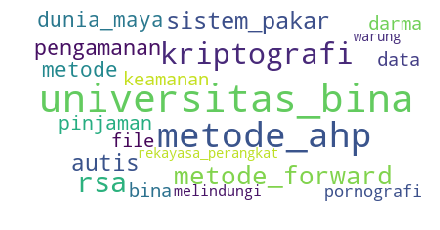

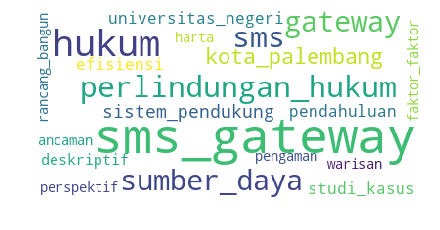

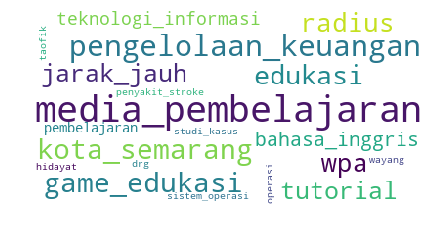

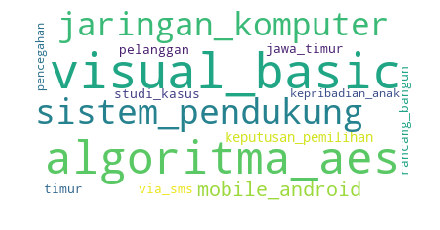

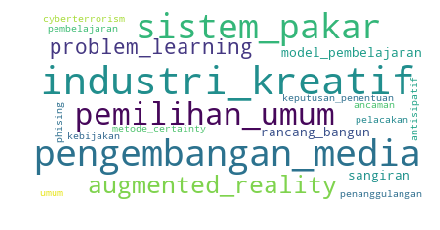

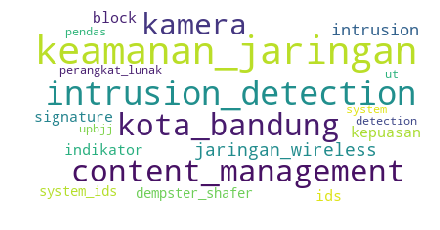

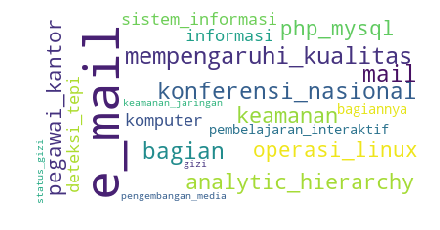

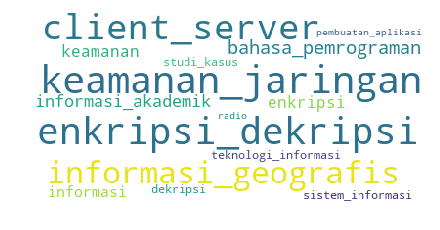

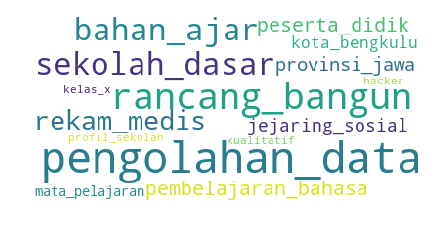

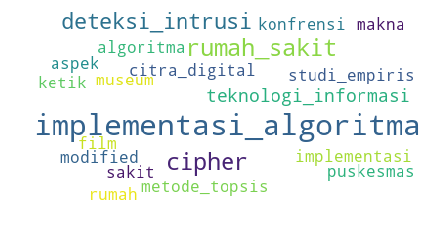

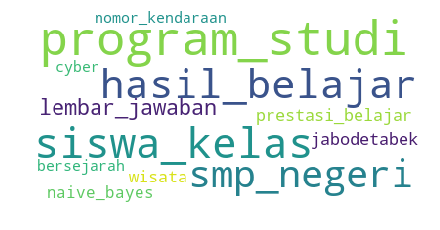

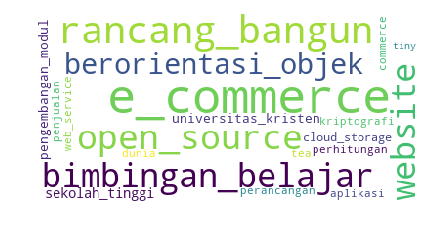

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud as wd

# # lower max_font_size, change the maximum number of word and lighten the background:
# wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()

for t in range(model.num_topics):
    plt.figure(figsize=(7,6))
    plt.imshow(wd(max_font_size=50, max_words=20, background_color="white", min_font_size=10).fit_words(dict(model.show_topic(t,200))))
    plt.axis("off")
#     plt.title("Topic #" + str(t))
#     plt.savefig("wcld-topic-"+str(t)+".png", facecolor='k')
#     plt.tight_layout(pad=0)
    plt.savefig("wcld-topic-"+str(t)+".png", facecolor='none', bbox_inches='tight')
    
# plt.show()

In [22]:
import pickle
filename = 'model2014.pkl'
pickle.dump(model, open(filename, 'wb'))
model.save('lda.model')